<a href="https://colab.research.google.com/github/ViniciusOSAntos/ASPNETCoreMVCLojaVirtual/blob/main/Sprint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quais os 10 programas mais vistos por emissora?

Estaremos utilizando da Metodoliga CRISP-DM de forma ágil

Assim passaremos por todas as fases possíveis da metodologia para responder a
pergunta acima e reiniciaremos o ciclo após estarmos satisfeitos com o resultado

# Bibliotecas

In [1]:
# %pip install google-cloud-bigquery

import pandas as pd
import os

from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap

# Definir o estilo padrão do Seaborn
sns.set()

# Import de dados

### Montando DRIVE para acessar as credenciais da GCP

In [2]:
from google.colab import drive
drive.mount('/content/drive')

json_key = '/content/drive/MyDrive/TCC/Notebooks/plasma-sol-358215-c1be2dea9cb4.json'


os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = json_key
print(os.environ["GOOGLE_APPLICATION_CREDENTIALS"])

%ls

Mounted at /content/drive
/content/drive/MyDrive/TCC/Notebooks/plasma-sol-358215-c1be2dea9cb4.json
drive/  sample_data/


### Transformando tabela BQ em Dataframe Pandas

In [3]:
# Client do BQ
client = bigquery.Client()

projeto = "plasma-sol-358215"

dataset_id = "TCC"

tabela_id = "IBOPE"

# referência da tabela
tabela_ref  = f"{projeto}.{dataset_id}.{tabela_id}"

consulta = f"SELECT * FROM {tabela_ref}"

# Montagem do Dataframe
df = client.query(consulta).to_dataframe()

#Resultados
df.head()

,Programa,Emissora,Audiencia_Domiciliar,Audiencia_Individual,COV_Individual,Audiencia_Domiciliar_SP,Audiencia_Individual_SP,COV_Individual_SP,Audiencia_Domiciliar_RJ,Audiencia_Individual_RJ,COV_Individual_RJ,Semana
0,ENCRENCA,REDE TV!,2.0,721.7,3.4,3.2,319.8,4.9,2.0,134.5,3.6,11-10-a-17-10-2021
1,FUTEBOL MAT,BAND,2.0,617.9,4.0,2.7,238.9,5.4,1.1,60.3,2.9,31-01-a-06-02-2022
2,MASTER CHEF,BAND,2.0,737.6,2.5,2.9,316.1,3.3,1.7,103.9,2.0,06-09-a-12-09-2021
3,THE BLACKLIST,BAND,2.0,671.7,2.3,2.3,221.8,2.6,1.1,64.1,1.6,05-07-a-11-07-2021
4,KICKBOXING NOT,BAND,2.0,640.9,1.6,2.2,206.0,2.0,1.2,64.7,1.0,05-07-a-11-07-2021


# Análise Exploratória do DataFrame

  
  ## Colunas do DataFrame

In [4]:
print("Colunas do DataFrame:")

df.dtypes

Colunas do DataFrame:


Programa                    object
Emissora                    object
Audiencia_Domiciliar       float64
Audiencia_Individual       float64
COV_Individual             float64
Audiencia_Domiciliar_SP    float64
Audiencia_Individual_SP    float64
COV_Individual_SP          float64
Audiencia_Domiciliar_RJ    float64
Audiencia_Individual_RJ    float64
COV_Individual_RJ          float64
Semana                      object
dtype: object

##Resumo Estatístico

In [5]:
print("Estatísticas Gerais do DataFrame:")
print()
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

Estatísticas Gerais do DataFrame:



,Audiencia_Domiciliar,Audiencia_Individual,COV_Individual,Audiencia_Domiciliar_SP,Audiencia_Individual_SP,COV_Individual_SP,Audiencia_Domiciliar_RJ,Audiencia_Individual_RJ,COV_Individual_RJ
count,4750.00,4750.00,4750.00,4750.00,4750.00,4750.00,4750.00,4750.00,4750.00
mean,7.50,2457.78,9.79,8.00,736.65,10.46,7.86,488.69,10.56
std,7.79,2565.16,9.07,7.67,706.95,8.69,8.98,562.07,10.36
min,0.40,97.10,0.20,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.60,513.82,3.10,2.30,211.22,3.90,1.30,78.30,2.90
50%,5.20,1686.90,7.60,5.70,521.10,8.50,4.80,288.95,7.10
75%,7.90,2572.72,12.70,8.50,777.80,13.80,7.90,497.18,14.10
max,33.20,11613.10,59.60,35.00,3406.70,58.90,38.30,2409.70,63.30


##Contagem de Valores Únicos

In [6]:
df.nunique()

Programa                    501
Emissora                      6
Audiencia_Domiciliar        268
Audiencia_Individual       4413
COV_Individual              378
Audiencia_Domiciliar_SP     296
Audiencia_Individual_SP    3872
COV_Individual_SP           394
Audiencia_Domiciliar_RJ     301
Audiencia_Individual_RJ    3353
COV_Individual_RJ           429
Semana                       95
dtype: int64

## Contagem de Valores Nulos

**Nenhum Núlo Foi Encontrado**

In [7]:
# Verificar a presença de valores nulos (True para nulo, False para não nulo)
valores_ausentes = df.isnull()

# Contar o número total de valores nulos em cada coluna
total_ausentes_por_coluna = df.isnull().sum()

# Calcular a proporção de valores nulos em cada coluna
proporcao_ausentes_por_coluna = (df.isnull().sum() / len(df)) * 100

# Criar um DataFrame para visualizar os resultados
resultados_tratamento = pd.DataFrame({
    'Total de Valores Ausentes': total_ausentes_por_coluna,
    'Proporção de Valores Ausentes (%)': proporcao_ausentes_por_coluna
})

print(resultados_tratamento)

                         Total de Valores Ausentes  \
Programa                                         0   
Emissora                                         0   
Audiencia_Domiciliar                             0   
Audiencia_Individual                             0   
COV_Individual                                   0   
Audiencia_Domiciliar_SP                          0   
Audiencia_Individual_SP                          0   
COV_Individual_SP                                0   
Audiencia_Domiciliar_RJ                          0   
Audiencia_Individual_RJ                          0   
COV_Individual_RJ                                0   
Semana                                           0   

                         Proporção de Valores Ausentes (%)  
Programa                                              0.00  
Emissora                                              0.00  
Audiencia_Domiciliar                                  0.00  
Audiencia_Individual                                 

##Correlação entre variáveis


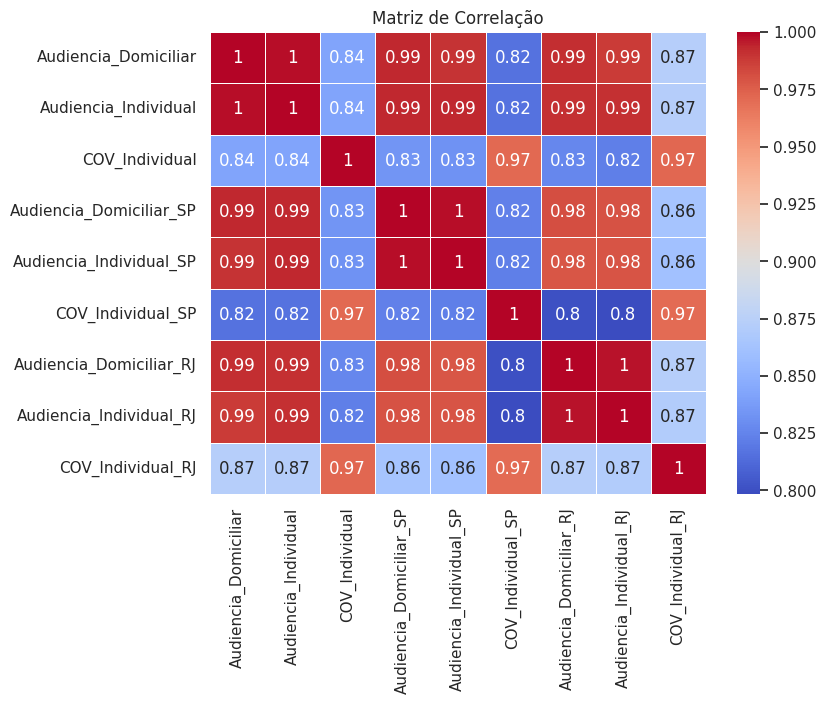

In [8]:
matriz_correlacao = df.corr(numeric_only=True)

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Histogramas e BoxPlots

In [9]:
# Função para Plots iguais, evitando reescrita


def plot_histogram_boxplot(df, column_name):
    # Criar uma figura com dois subplots lado a lado, com larguras diferentes
    plt.figure(figsize=(12, 6))

    # Subplot 1 - Histograma
    plt.subplot(1, 2, 1)  # Número de linhas, número de colunas, posição do subplot
    plt.hist(df[column_name], bins=10)
    plt.title(f'Histograma {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequência')
    plt.grid(True)

    # Subplot 2 - Boxplot
    plt.subplot(1, 2, 2)  # Número de linhas, número de colunas, posição do subplot
    plt.boxplot(df[column_name])
    plt.title(f'Boxplot {column_name}')
    plt.ylabel('Valores')

    # Ajustar a largura do boxplot para melhor visualização
    plt.subplots_adjust(wspace=0.5)

    # Exibir a figura com os dois gráficos lado a lado
    plt.show()



###Audiência Domiciliar

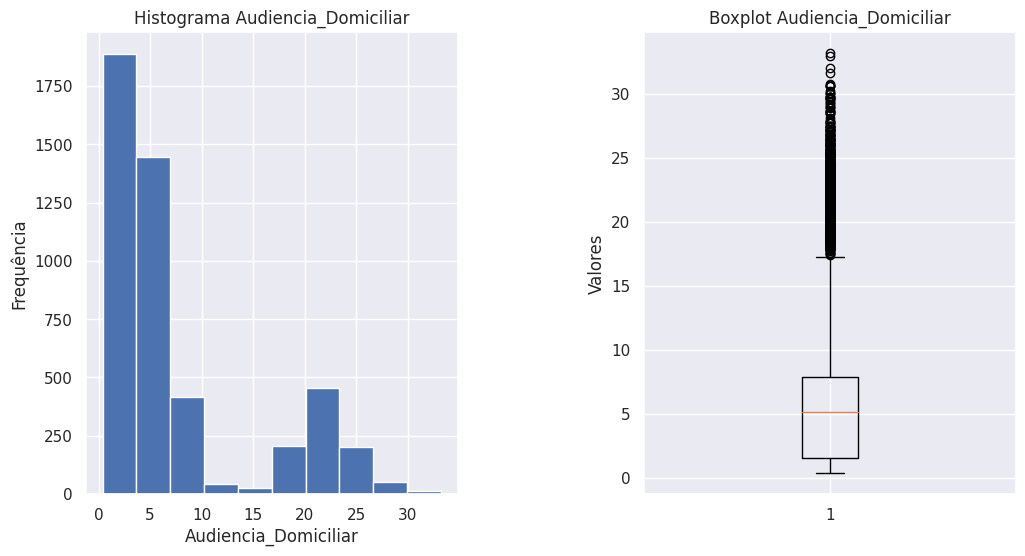

In [10]:
plot_histogram_boxplot(df, 'Audiencia_Domiciliar')

###Audiência Individual

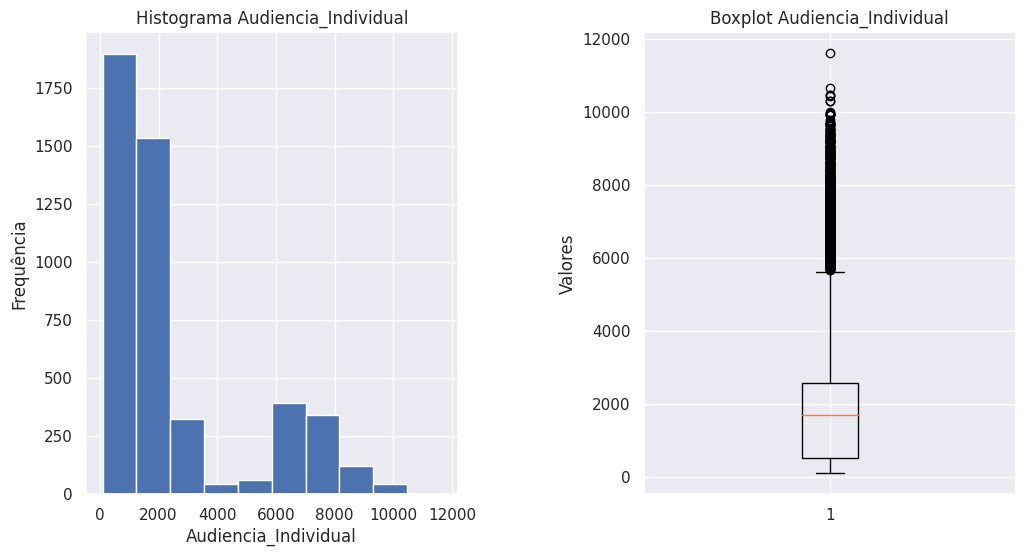

In [11]:
plot_histogram_boxplot(df, 'Audiencia_Individual')

###COV Individual

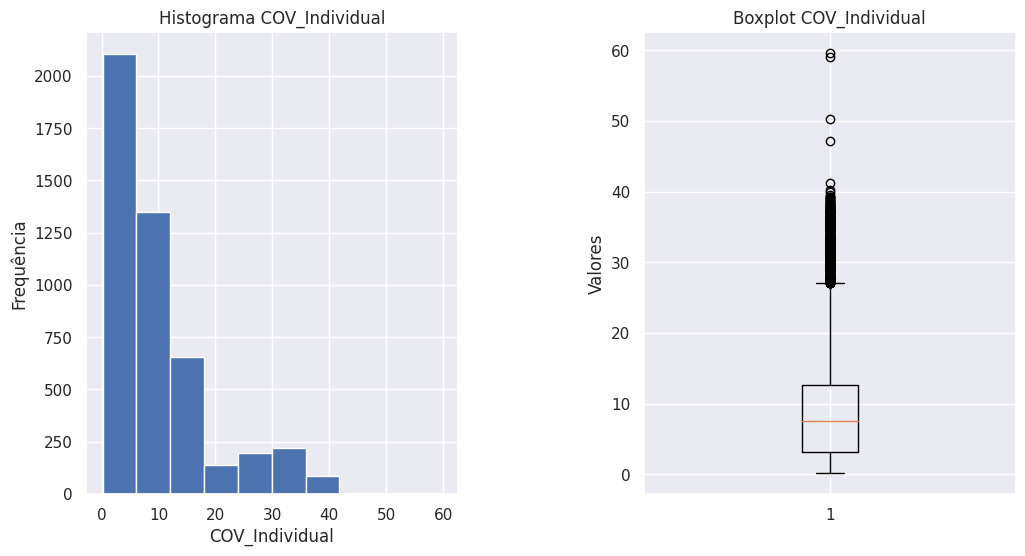

In [12]:
plot_histogram_boxplot(df, 'COV_Individual')

# TOP 10 médias de audiência por emissora

TOP 10 Média Geral

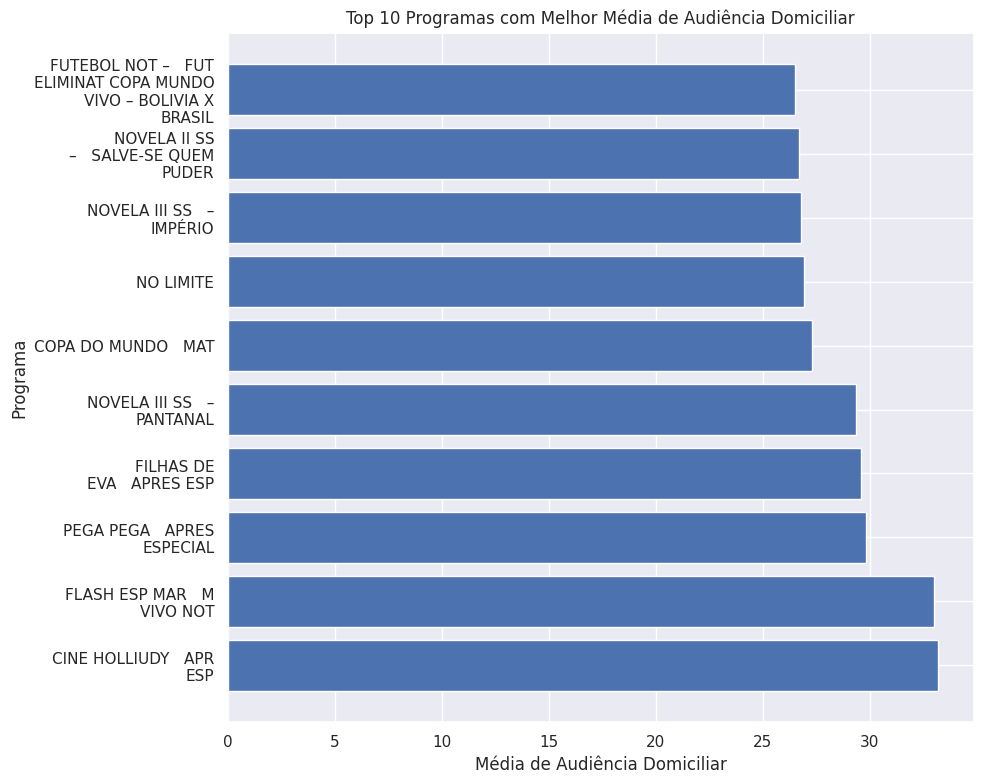

In [13]:
# 1. Calcular a média de Audiencia_Domiciliar para cada programa
media_audiencia_por_programa = df.groupby('Programa')['Audiencia_Domiciliar'].mean()

# 2. Ordenar os programas com base nas médias calculadas
media_audiencia_por_programa = media_audiencia_por_programa.sort_values(ascending=False)

# 3. Selecionar os programas com as melhores médias (por exemplo, os top 10)
top_programas = media_audiencia_por_programa.head(10)

# Quebrar os nomes dos programas em várias linhas com base em um número máximo de caracteres por linha
max_chars_per_line = 20  # Número máximo de caracteres por linha
top_programas_wrapped = [textwrap.fill(nome_programa, max_chars_per_line) for nome_programa in top_programas.index]

# 4. Gerar o gráfico de barras horizontais para representar os programas selecionados
plt.figure(figsize=(10, 8))
plt.barh(top_programas_wrapped, top_programas.values)
plt.xlabel('Média de Audiência Domiciliar')
plt.ylabel('Programa')
plt.title('Top 10 Programas com Melhor Média de Audiência Domiciliar')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

Função Plot TOP 10 por emissora

In [14]:
def plot_top_programas_por_emissora(df, nome_emissora, top_n=10, max_chars_per_line=20):
    # 1. Filtrar o DataFrame para obter apenas os dados da emissora especificada
    df_emissora = df[df['Emissora'] == nome_emissora]

    # 2. Calcular a média de Audiencia_Domiciliar, Audiencia_Individual e COV_Individual para cada programa da emissora especificada
    media_audiencia_por_programa = df_emissora.groupby('Programa')['Audiencia_Domiciliar'].mean()
    media_audiencia_individual_por_programa = df_emissora.groupby('Programa')['Audiencia_Individual'].mean()
    media_cov_individual_por_programa = df_emissora.groupby('Programa')['COV_Individual'].mean()

    # 3. Ordenar os programas com base nas médias calculadas de Audiencia_Domiciliar
    top_programas_emissora = media_audiencia_por_programa.sort_values(ascending=False).head(top_n)

    # Quebrar os nomes dos programas em várias linhas com base no número máximo de caracteres por linha
    top_programas_emissora_wrapped = [textwrap.fill(nome_programa, max_chars_per_line) for nome_programa in top_programas_emissora.index]

    # 4. Criar uma figura com três subplots
    plt.figure(figsize=(32, 13.5))

    # Plotar o gráfico de Audiencia_Domiciliar
    plt.subplot(1, 3, 1)
    plt.barh(top_programas_emissora_wrapped, top_programas_emissora.values)
    plt.xlabel('Média de Audiência Domiciliar')
    plt.ylabel('Programa', fontsize=16)
    plt.title(f'Top {top_n} Programas da {nome_emissora}\nMédia de Audiência Domiciliar', fontsize=16)
    plt.grid(axis='y')
    plt.xlim(0, 35)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Plotar o gráfico de Audiencia_Individual
    plt.subplot(1, 3, 2)
    plt.barh(top_programas_emissora_wrapped, media_audiencia_individual_por_programa[top_programas_emissora.index])
    plt.xlabel('Média de Audiência Individual')
    plt.title(f'Top {top_n} Programas da {nome_emissora}\nMédia de Audiência Individual', fontsize=16)
    plt.grid(axis='y')
    plt.xlim(0, 12000)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Plotar o gráfico de COV_Individual
    plt.subplot(1, 3, 3)
    plt.barh(top_programas_emissora_wrapped, media_cov_individual_por_programa[top_programas_emissora.index])
    plt.xlabel('Média de COV Individual',)
    plt.title(f'Top {top_n} Programas da {nome_emissora}\nMédia de COV Individual', fontsize=16)
    plt.grid(axis='y')
    plt.xlim(0, 45)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Ajustar o espaçamento entre os subplots
    plt.subplots_adjust(wspace=0.5)

    plt.tight_layout()
    plt.show()

###TOP 10 GLOBO

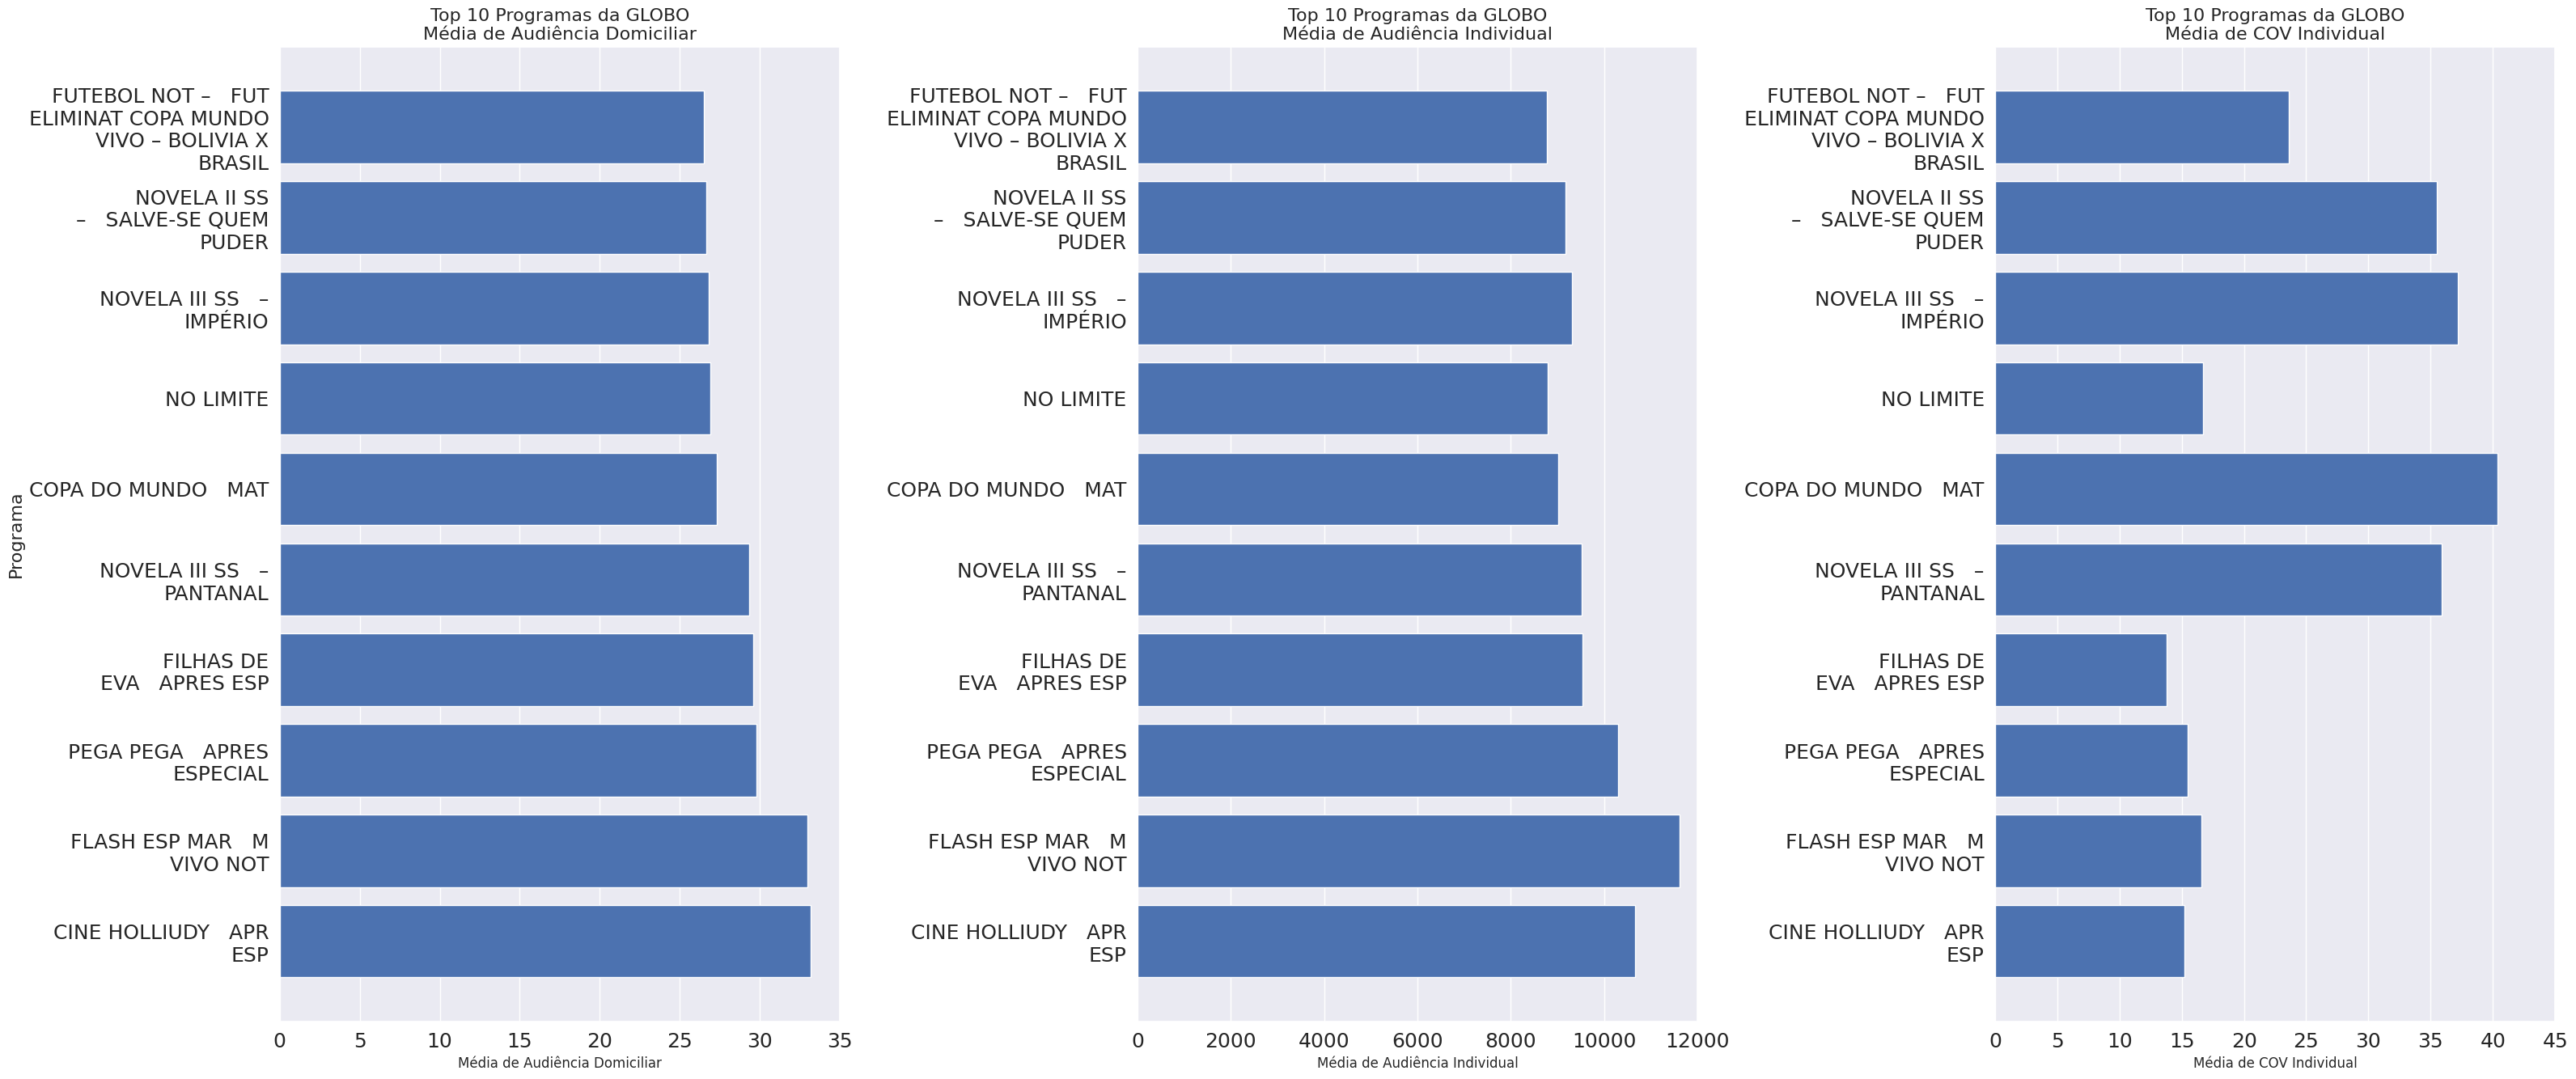

In [15]:
plot_top_programas_por_emissora(df, 'GLOBO', top_n=10, max_chars_per_line=20)

###TOP 10 BAND

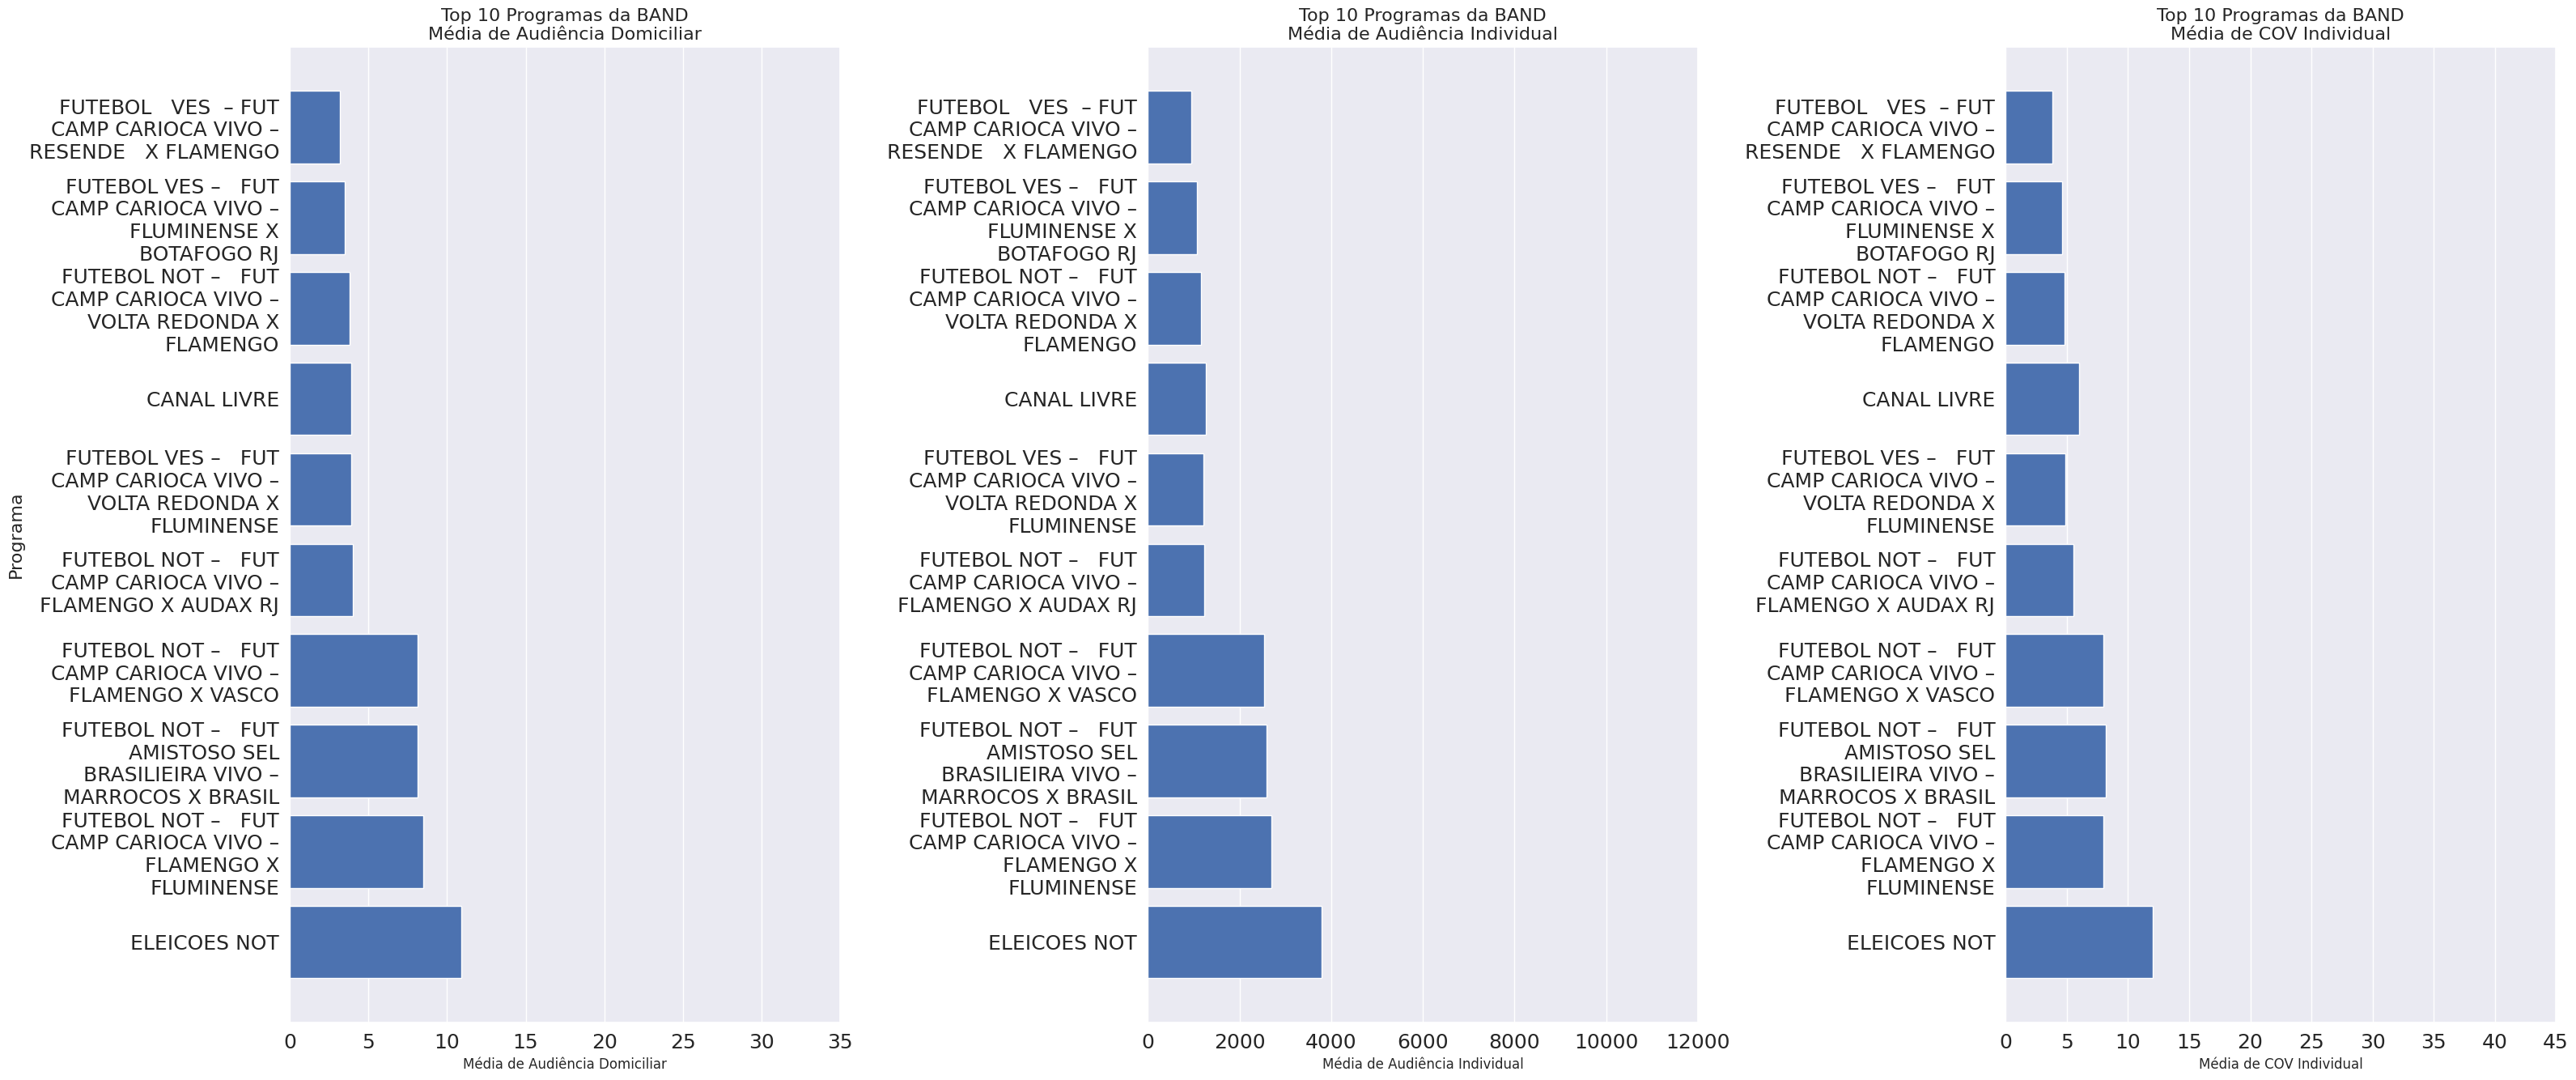

In [16]:
plot_top_programas_por_emissora(df, 'BAND', top_n=10, max_chars_per_line=20)

###**TOP** 10 RECORD

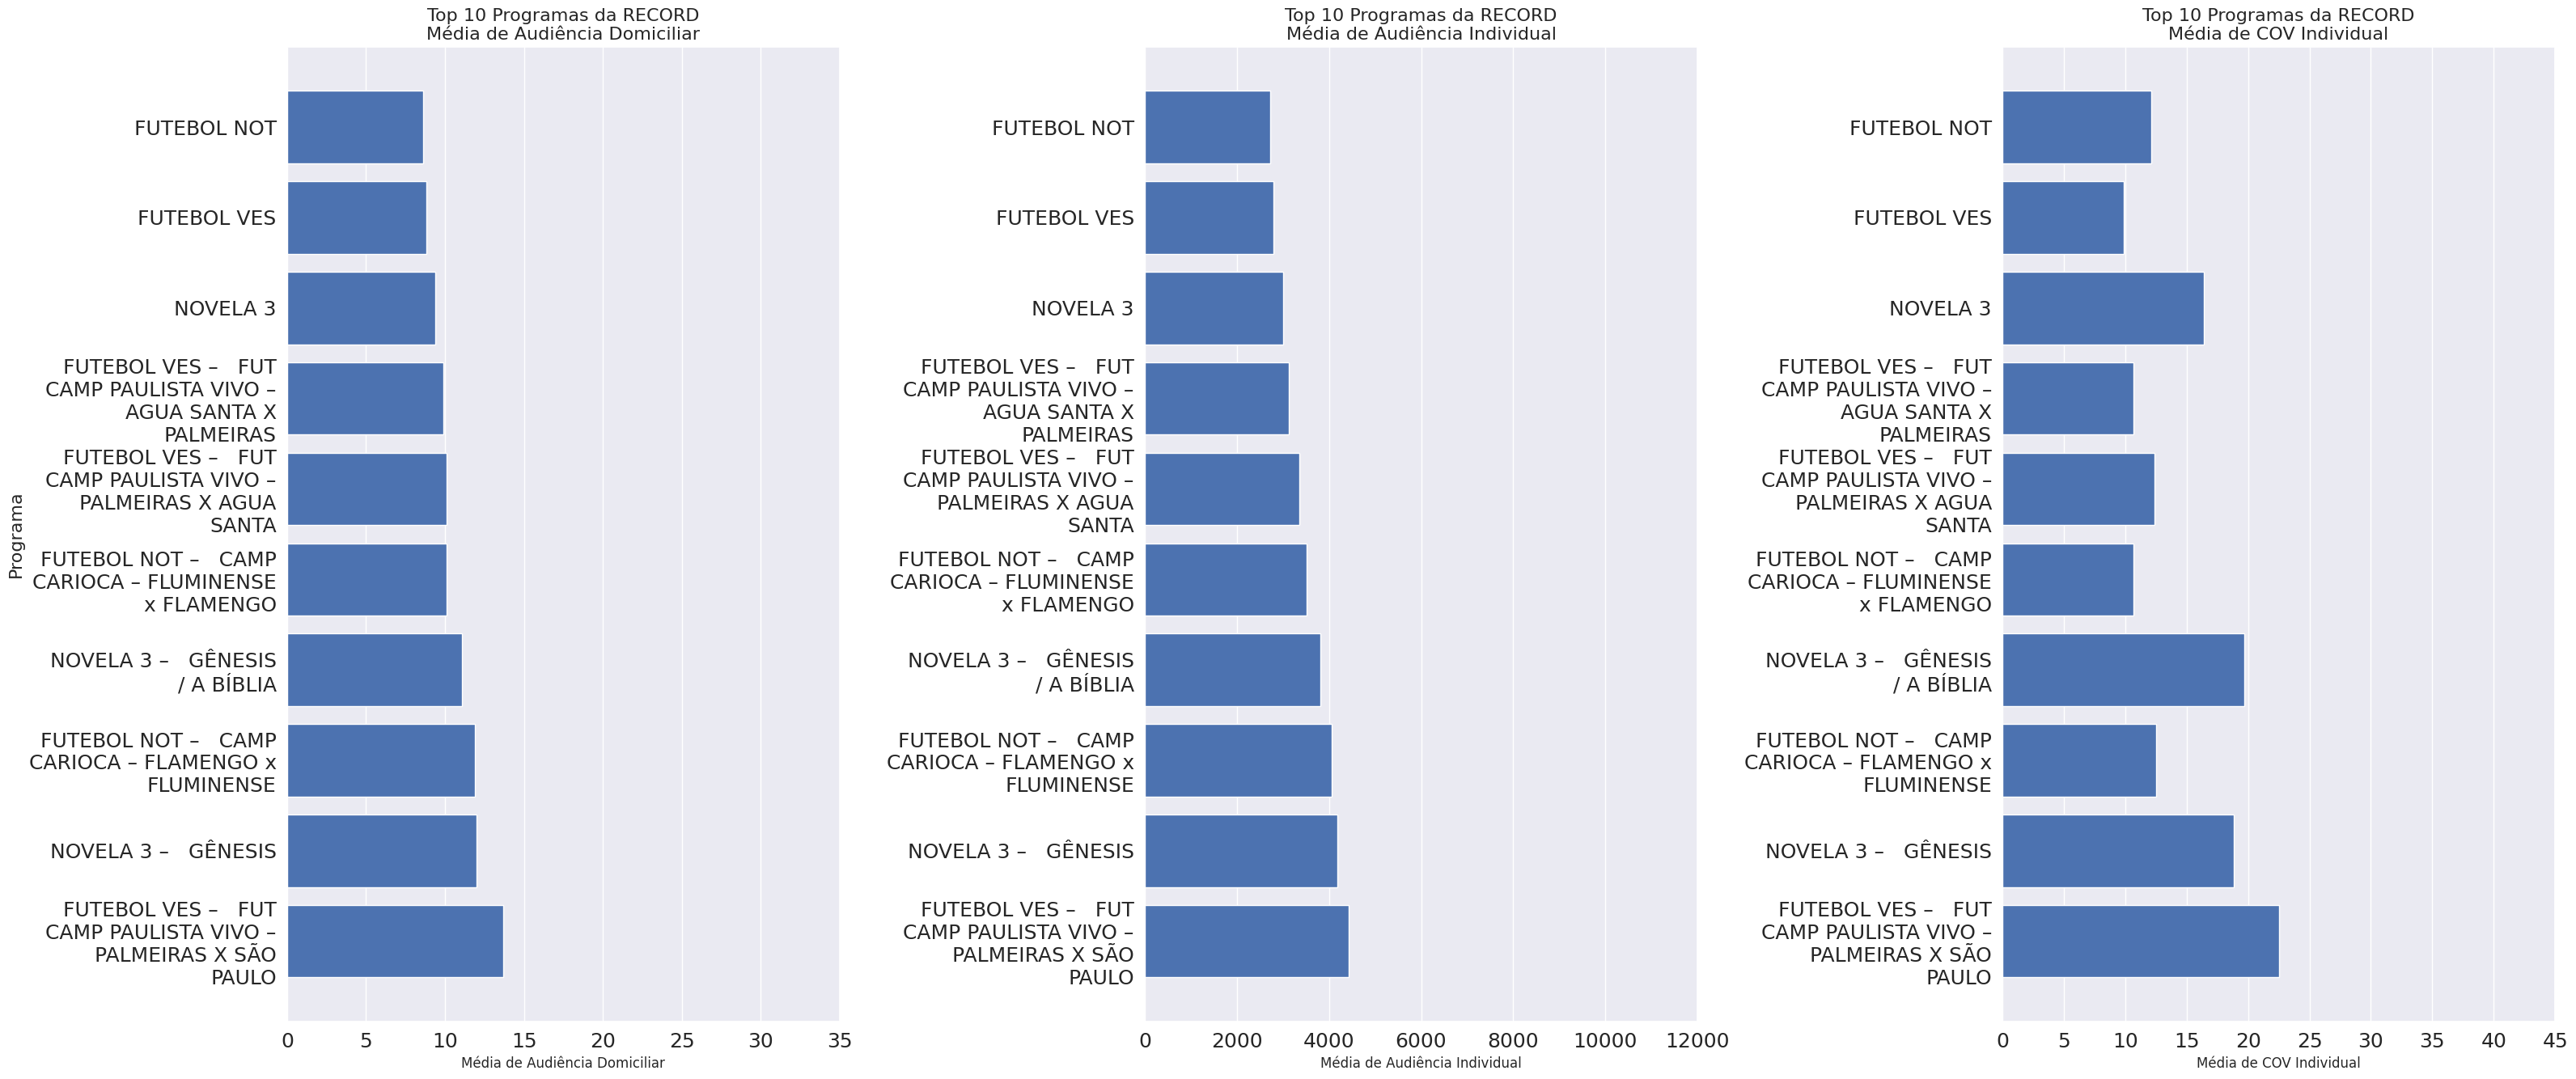

In [17]:
plot_top_programas_por_emissora(df, 'RECORD', top_n=10, max_chars_per_line=20)

###TOP 10 SBT

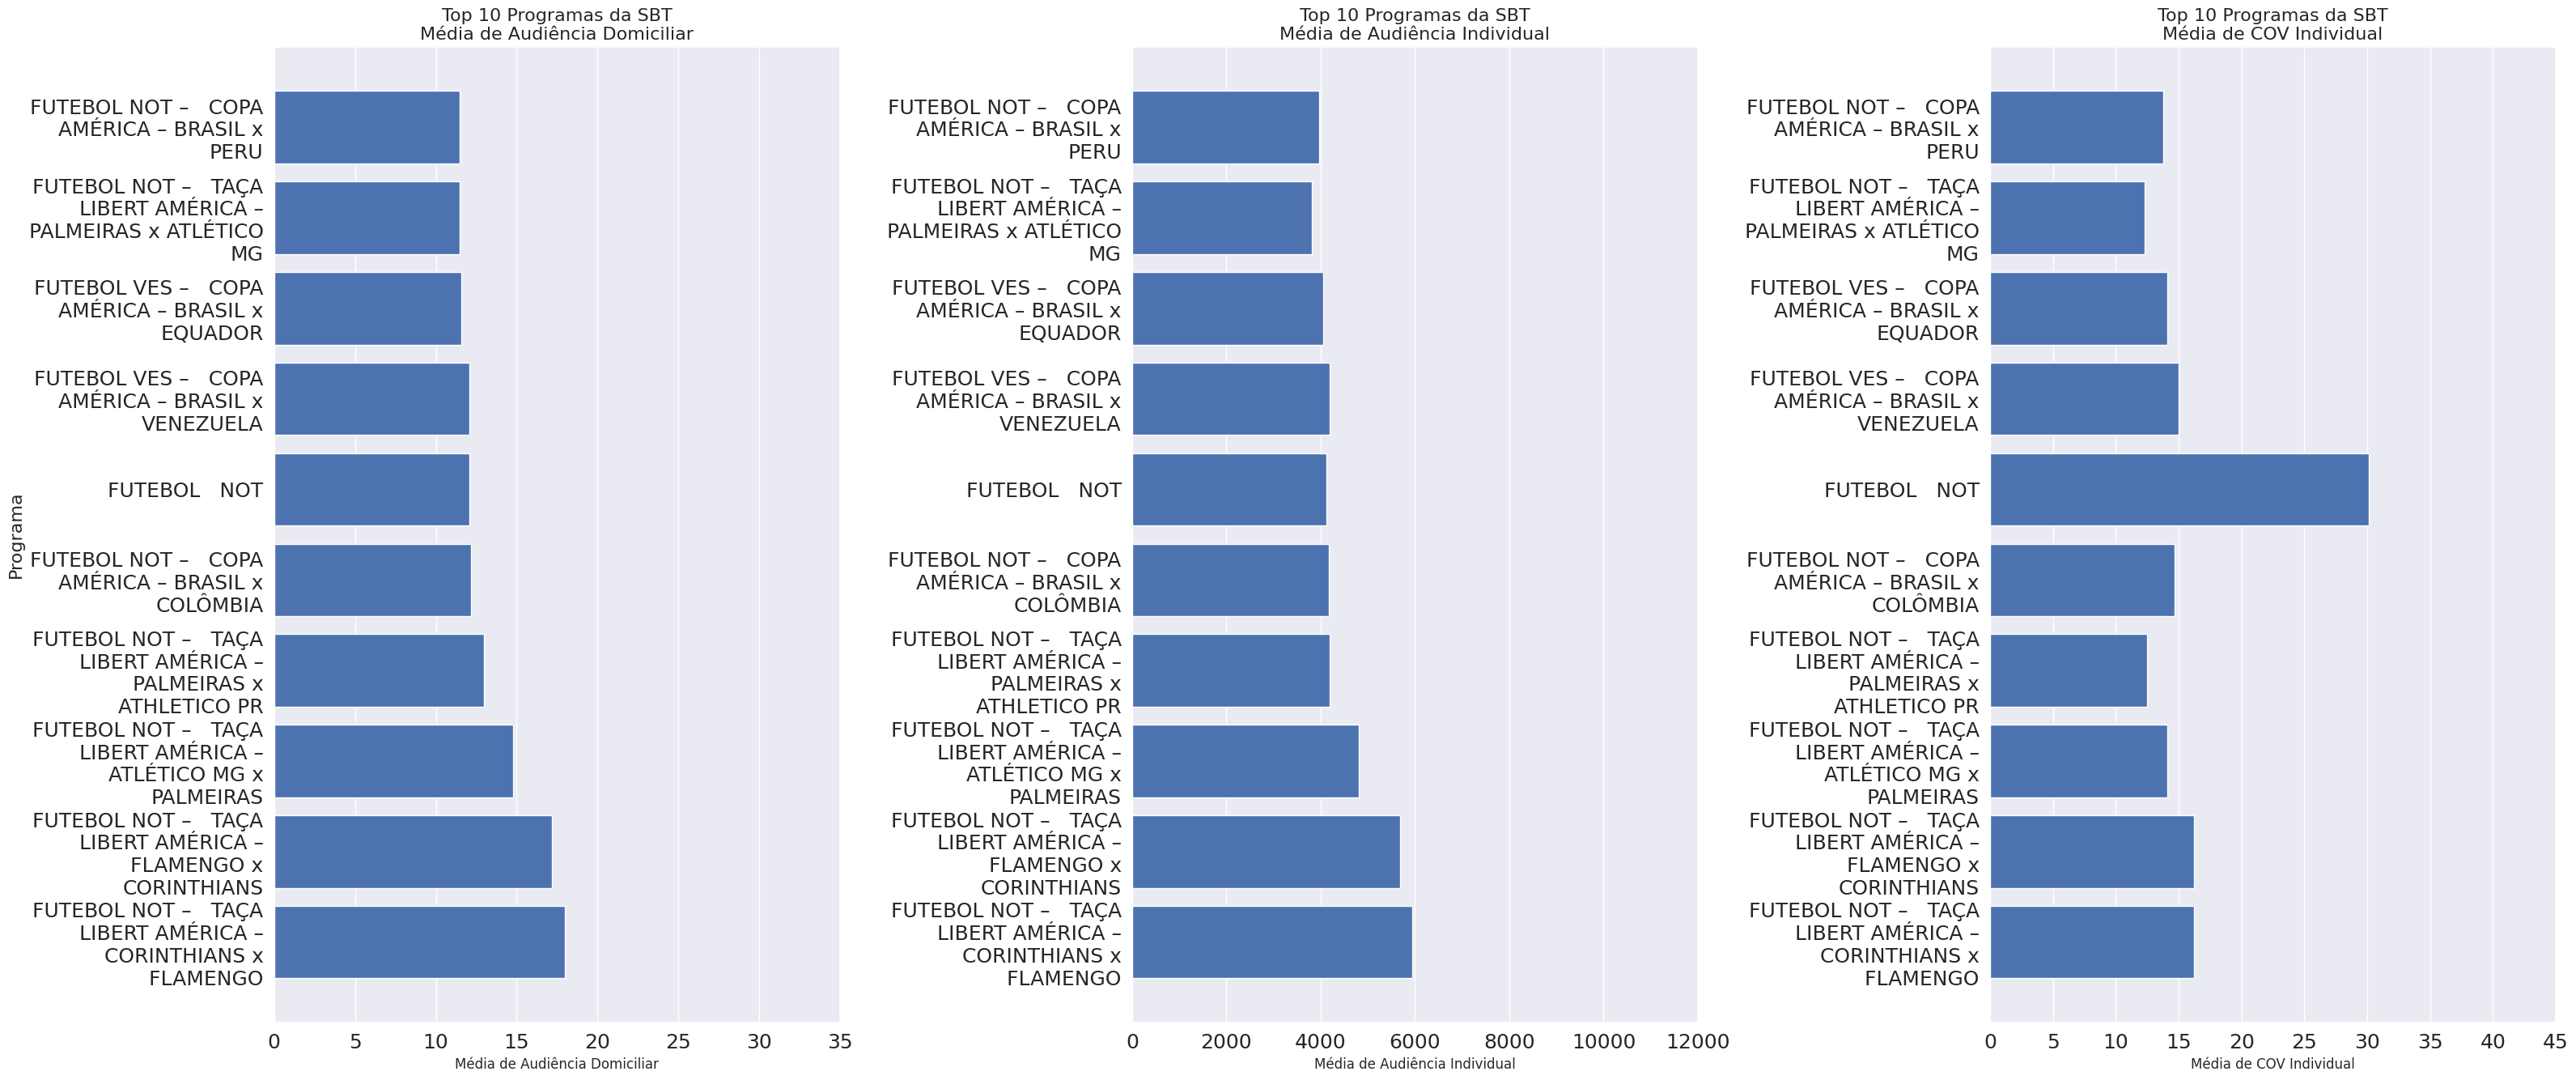

In [18]:
plot_top_programas_por_emissora(df, 'SBT', top_n=10, max_chars_per_line=20)

###TOP 10 REDE TV!

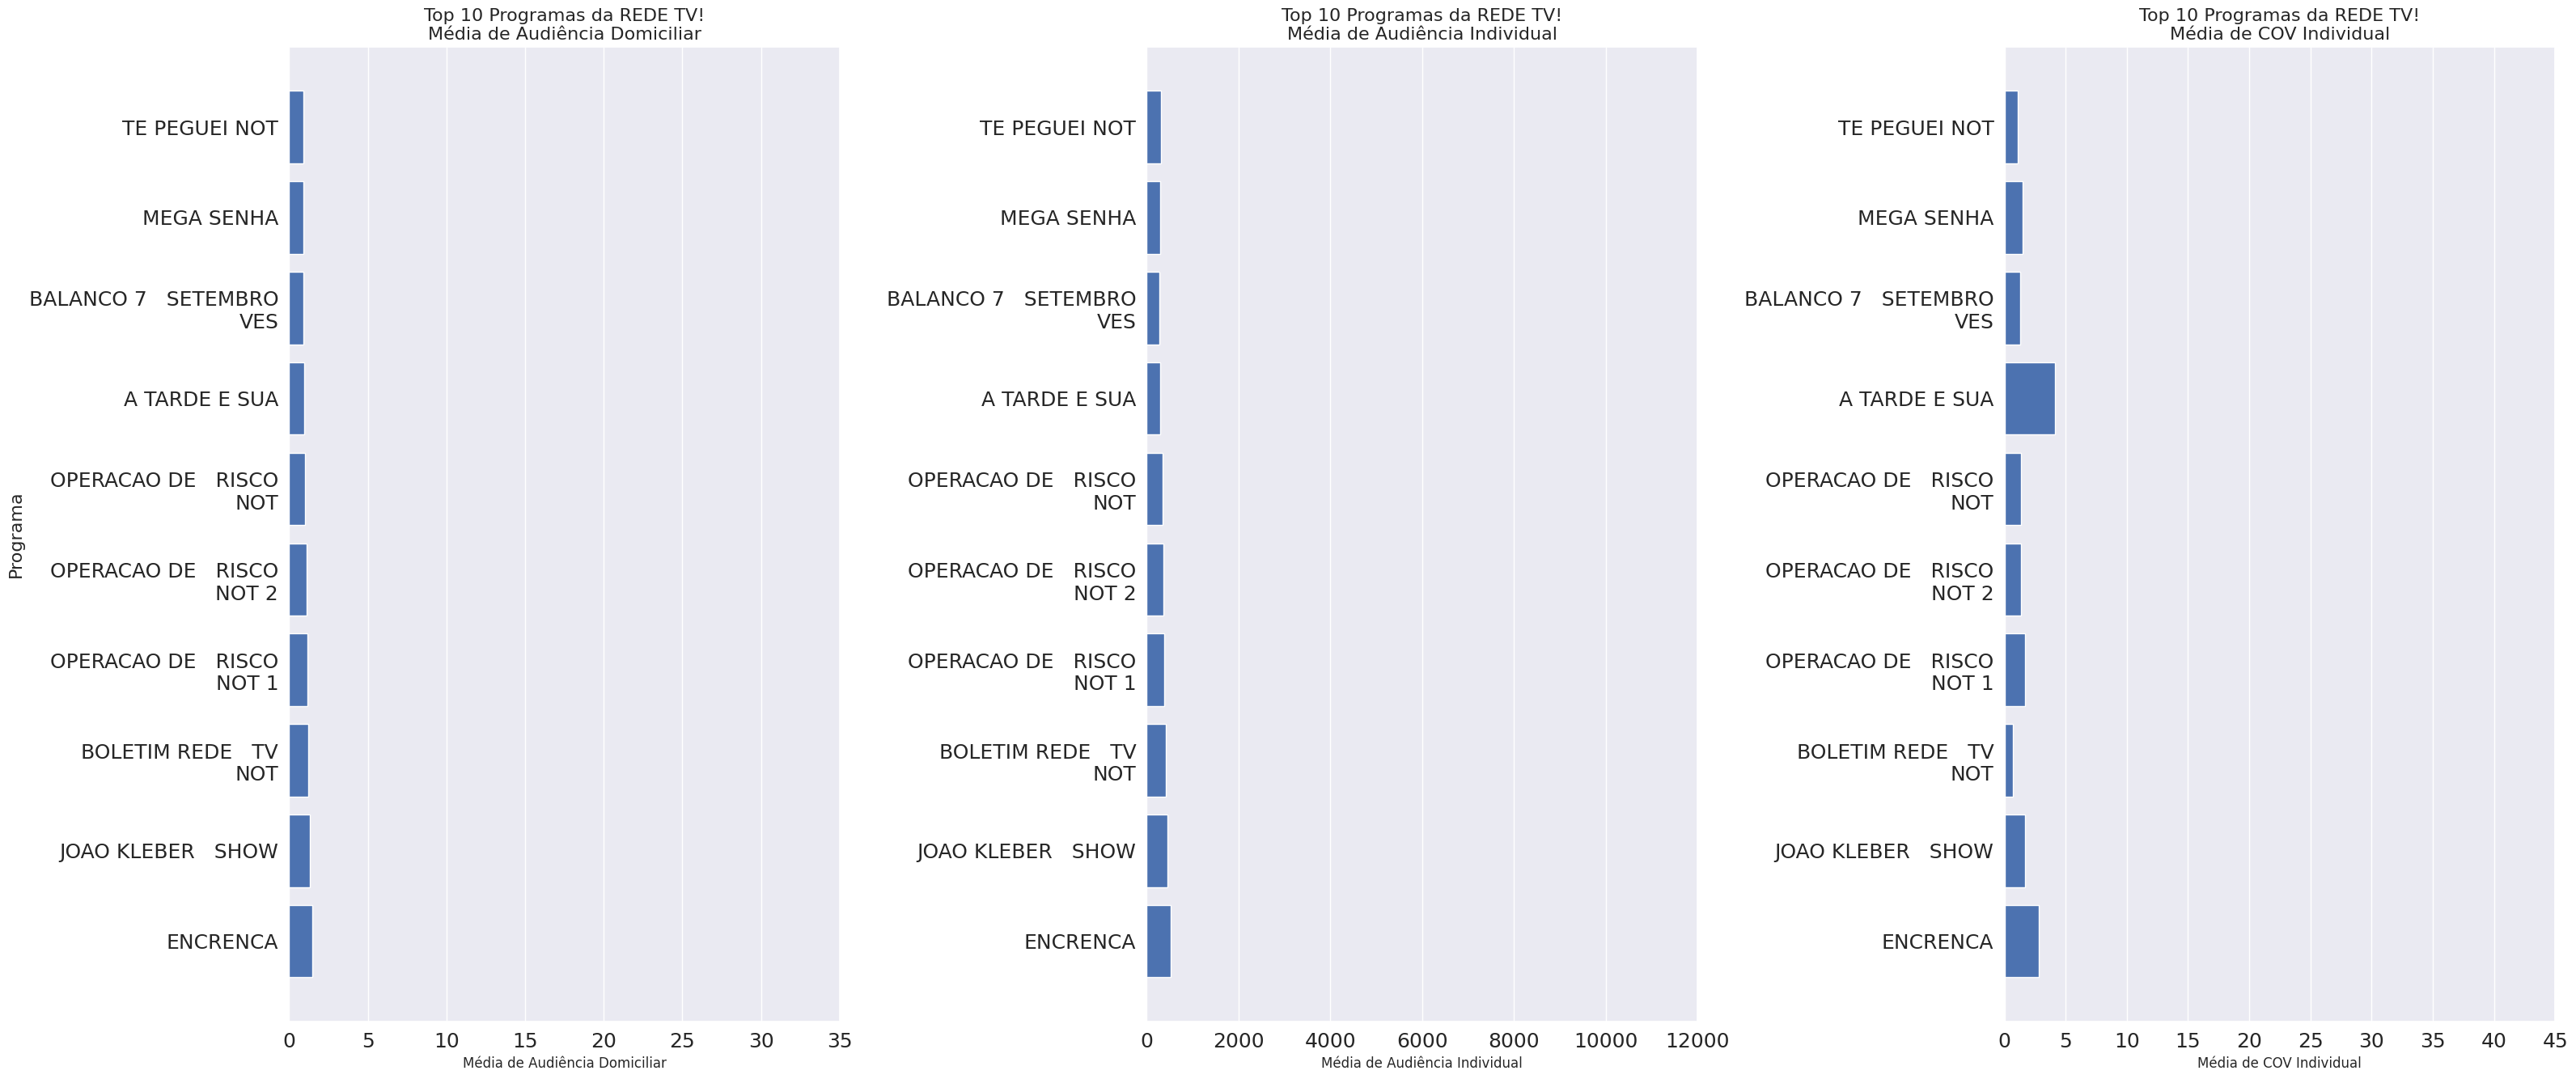

In [19]:
plot_top_programas_por_emissora(df, 'REDE TV!', top_n=10, max_chars_per_line=20)

Deu pra perceber que Futebol dá retorno de audiência. O que é difícil dizer é se dá retorno financeiro ou não, já que as quotas são bem caras.

# Filtrando Eventos Sazionais Como COPA DO MUNDO e ELEIÇÕES

In [27]:
# Fazer um slice do DataFrame para eliminar as ocorrências com "ELEI" e "COPA" na coluna "Programa"
df_filtered = df[~df['Programa'].str.contains('ELEI|COPA|FUT')]
df_filtered.head()

,Programa,Emissora,Audiencia_Domiciliar,Audiencia_Individual,COV_Individual,Audiencia_Domiciliar_SP,Audiencia_Individual_SP,COV_Individual_SP,Audiencia_Domiciliar_RJ,Audiencia_Individual_RJ,COV_Individual_RJ,Semana
0,ENCRENCA,REDE TV!,2.00,721.70,3.40,3.20,319.80,4.90,2.00,134.50,3.60,11-10-a-17-10-2021
2,MASTER CHEF,BAND,2.00,737.60,2.50,2.90,316.10,3.30,1.70,103.90,2.00,06-09-a-12-09-2021
3,THE BLACKLIST,BAND,2.00,671.70,2.30,2.30,221.80,2.60,1.10,64.10,1.60,05-07-a-11-07-2021
4,KICKBOXING NOT,BAND,2.00,640.90,1.60,2.20,206.00,2.00,1.20,64.70,1.00,05-07-a-11-07-2021
5,TERCEIRO TEMPO,BAND,2.00,604.90,3.20,3.10,274.30,4.20,0.80,41.80,2.00,10-05-a-16-05-2021


###TOP 10 GLOBO FILTRADO

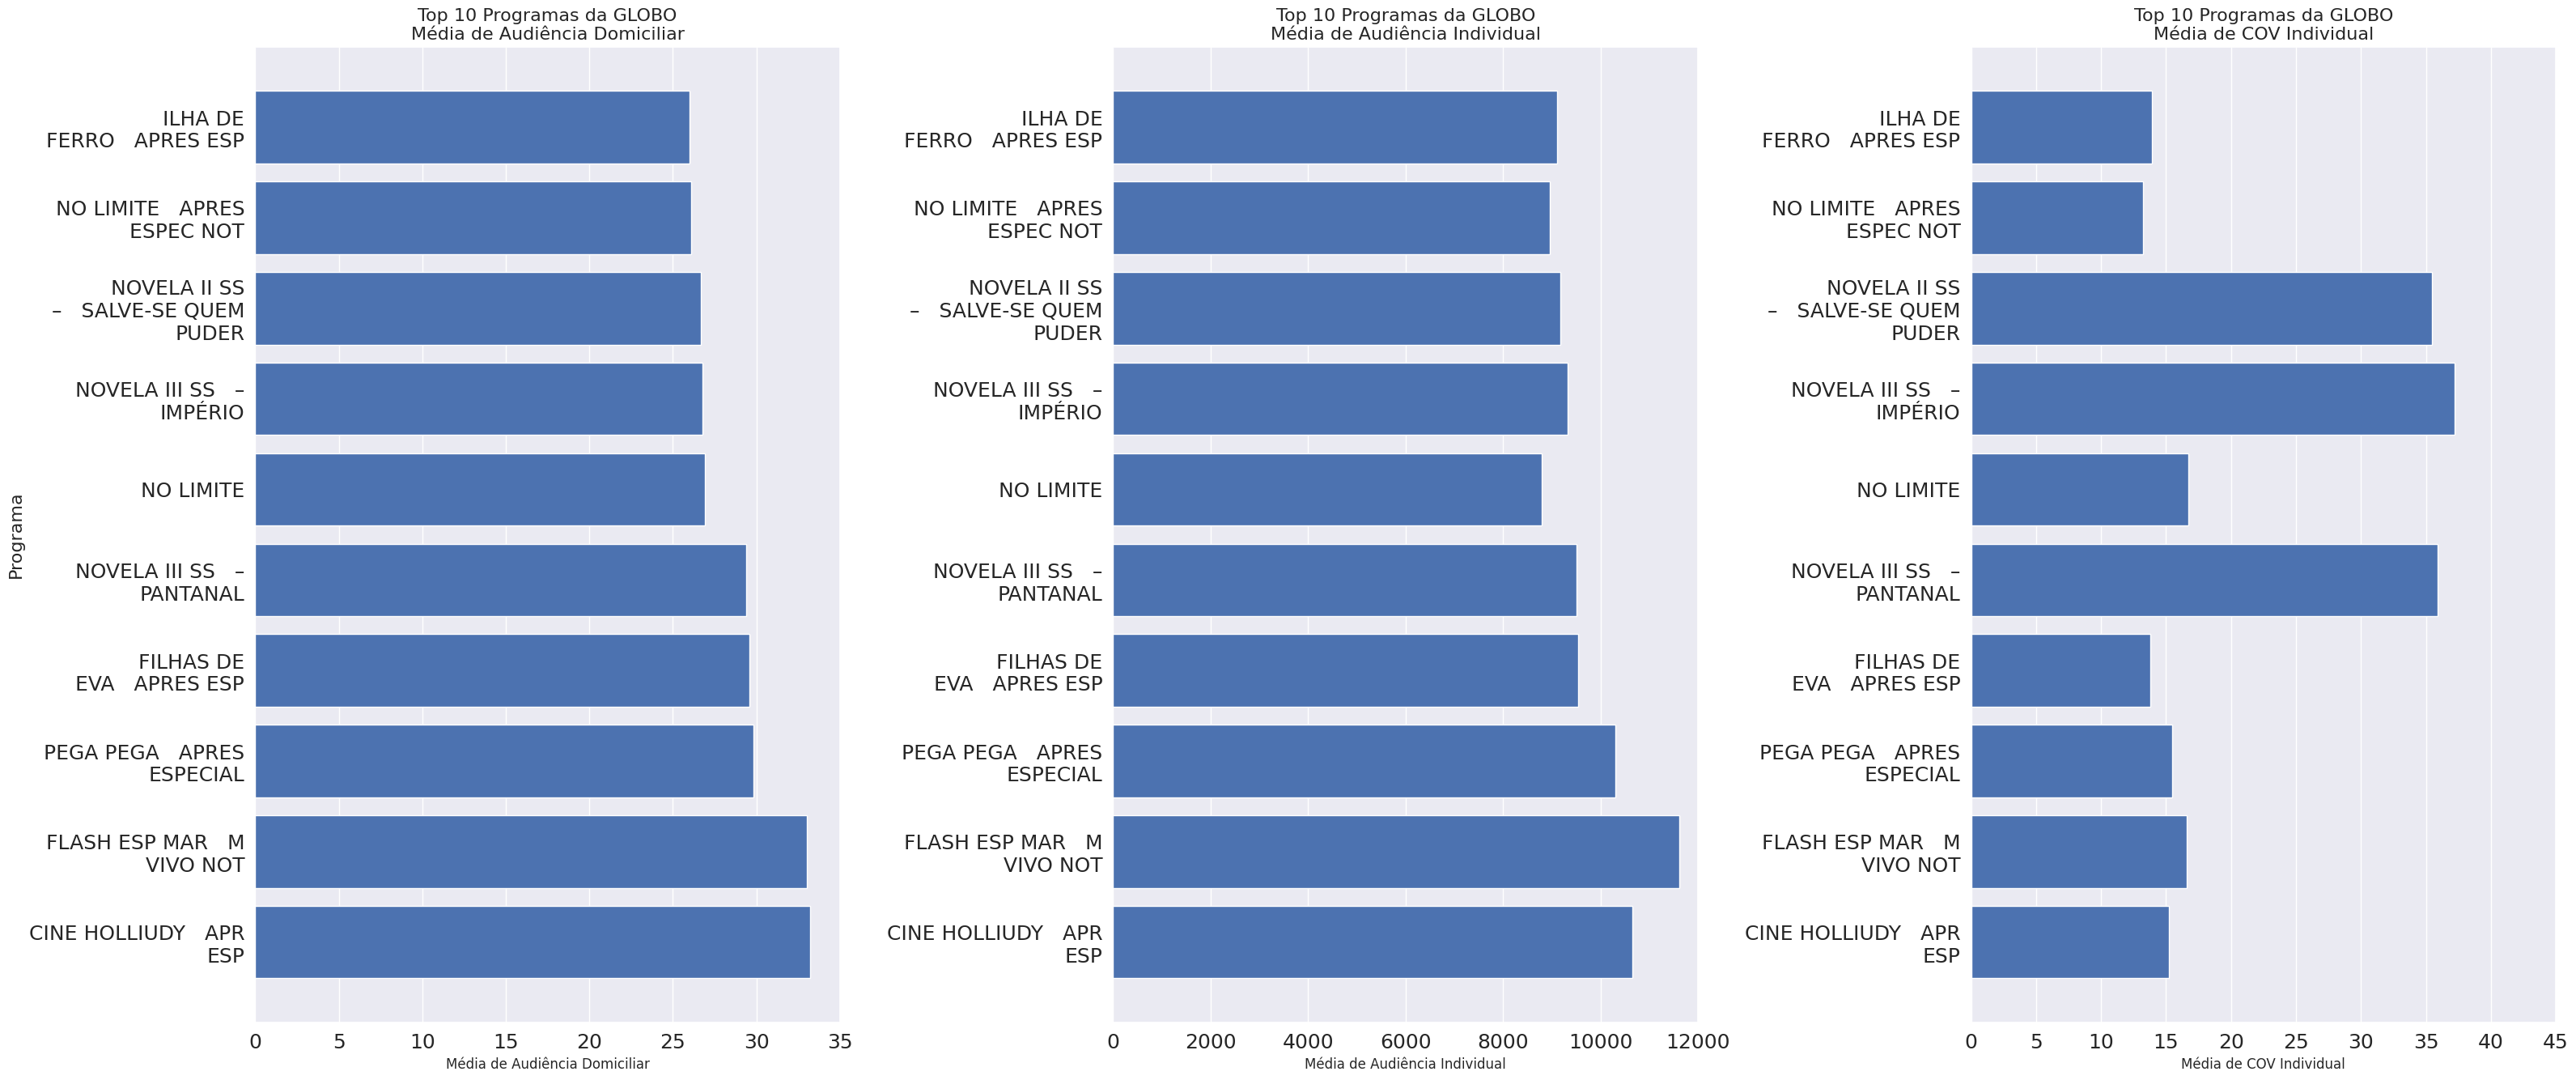

In [28]:
plot_top_programas_por_emissora(df_filtered, 'GLOBO', top_n=10, max_chars_per_line=20)

###TOP 10 BAND FILTRADO

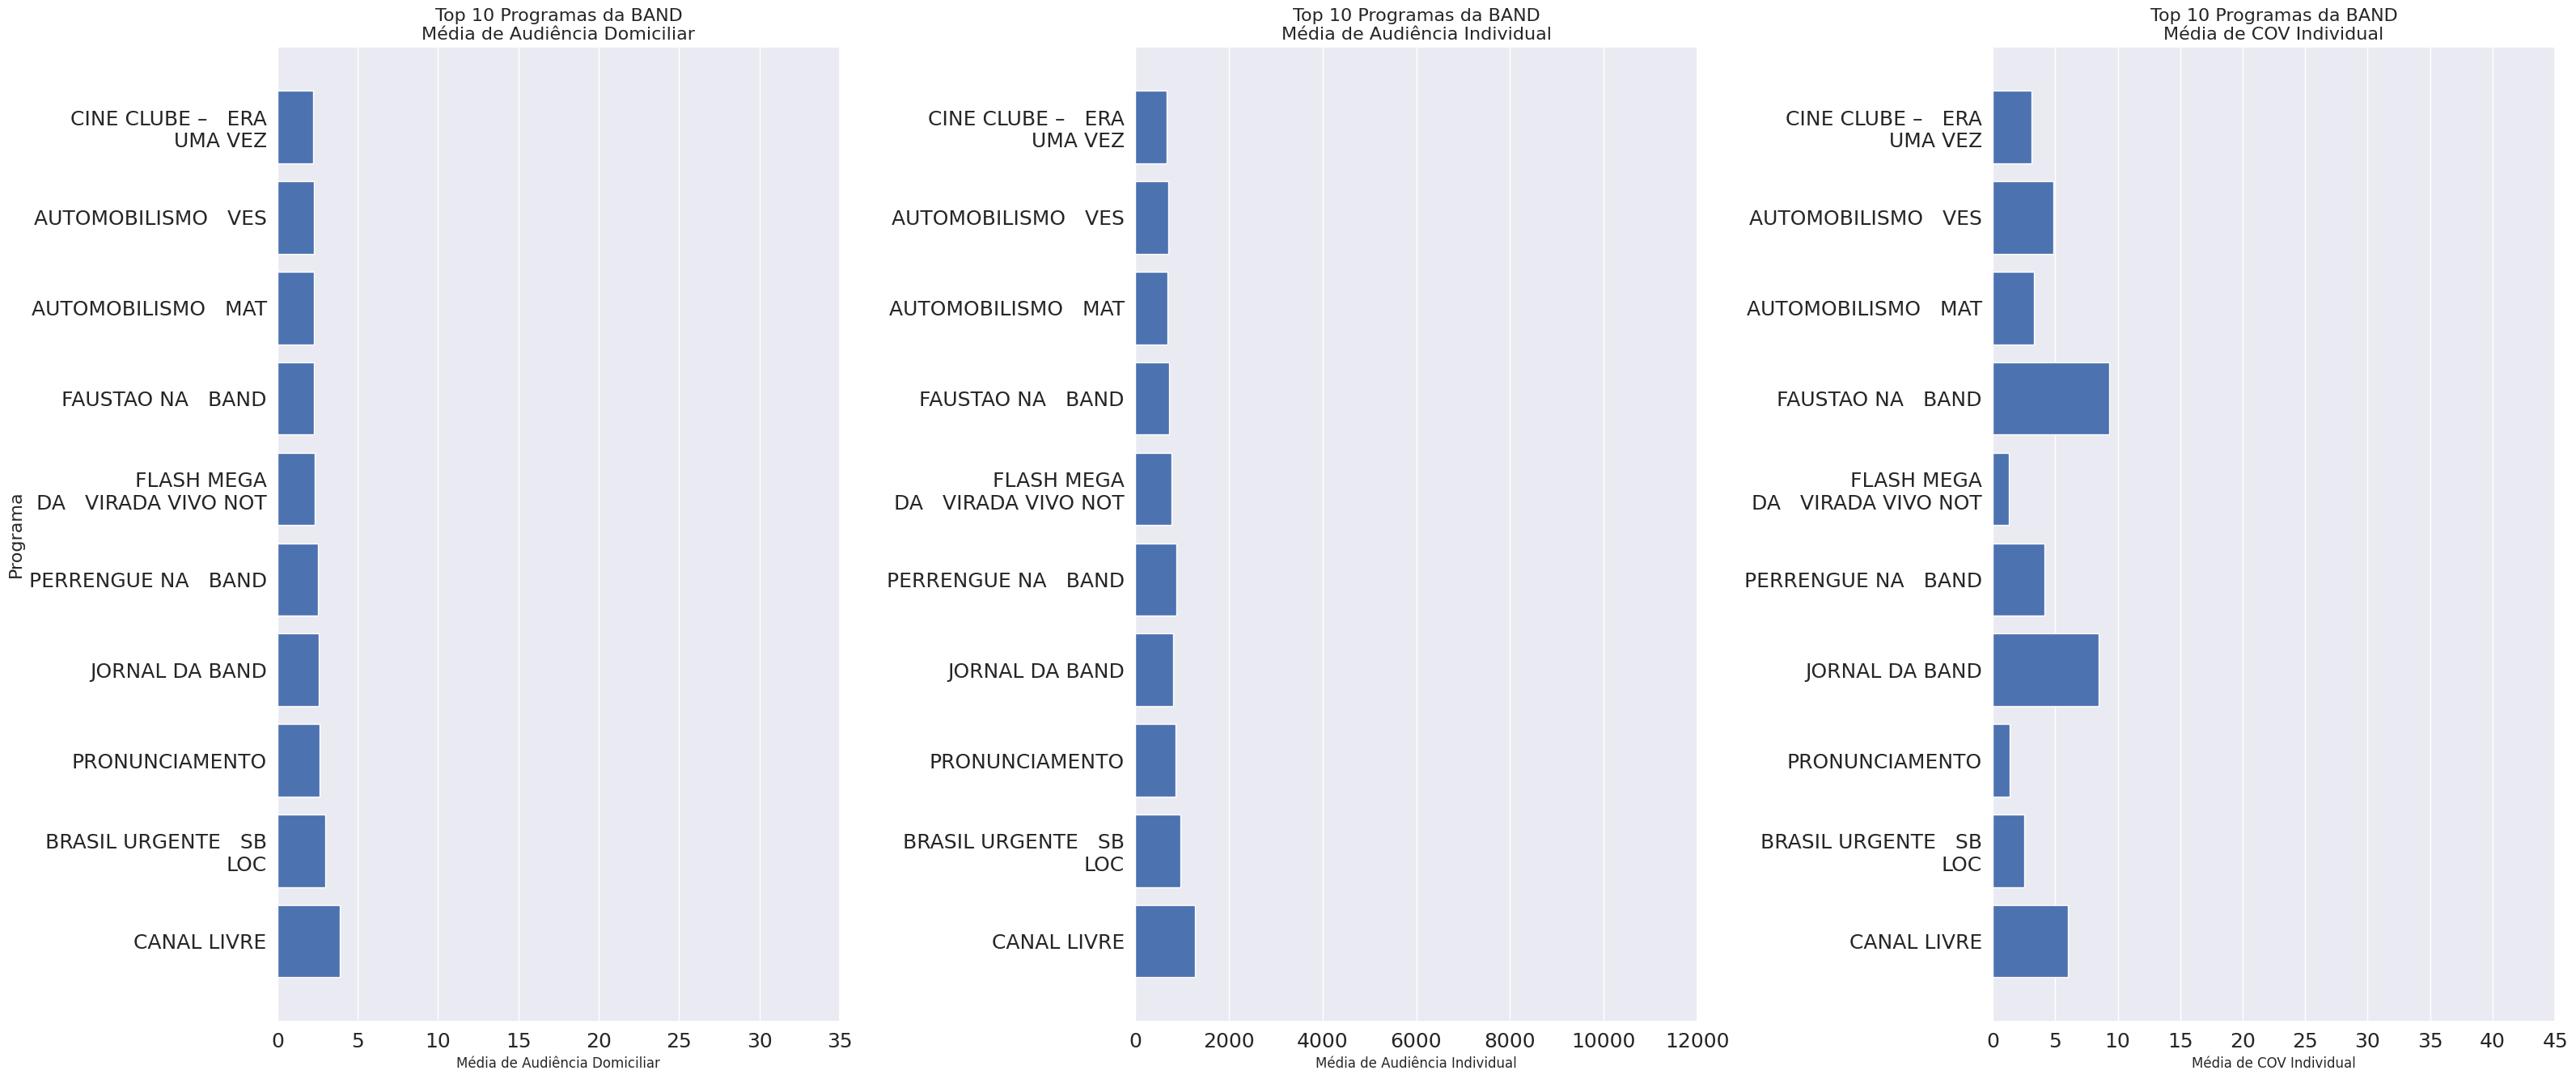

In [29]:
plot_top_programas_por_emissora(df_filtered, 'BAND', top_n=10, max_chars_per_line=20)

###TOP 10 RECORD FILTRADO

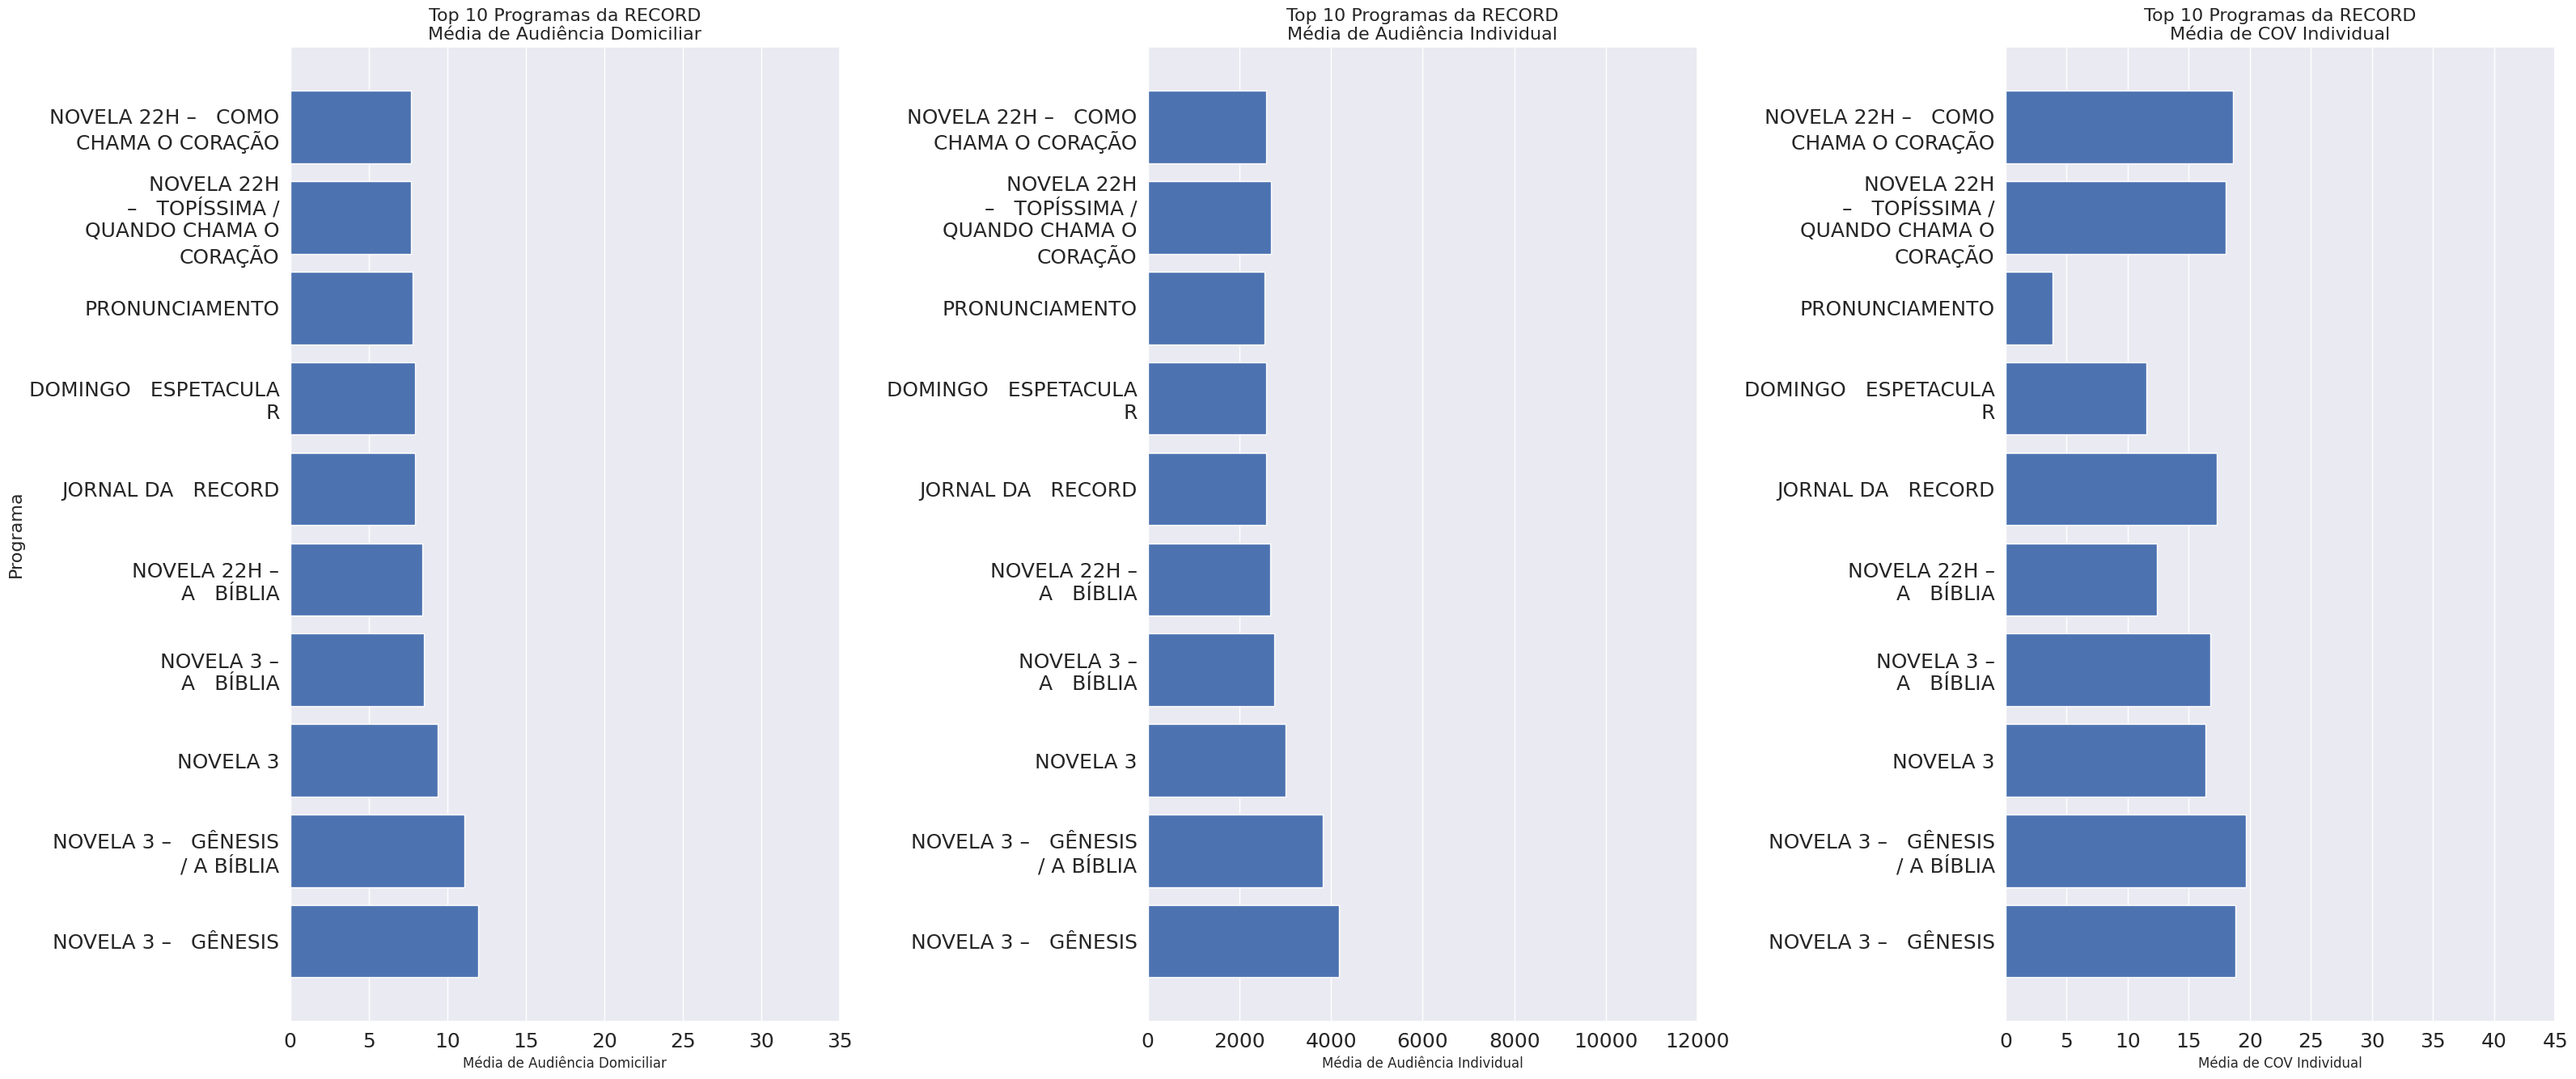

In [30]:
plot_top_programas_por_emissora(df_filtered, 'RECORD', top_n=10, max_chars_per_line=20)

### TOP 10 SBT FILTRADO


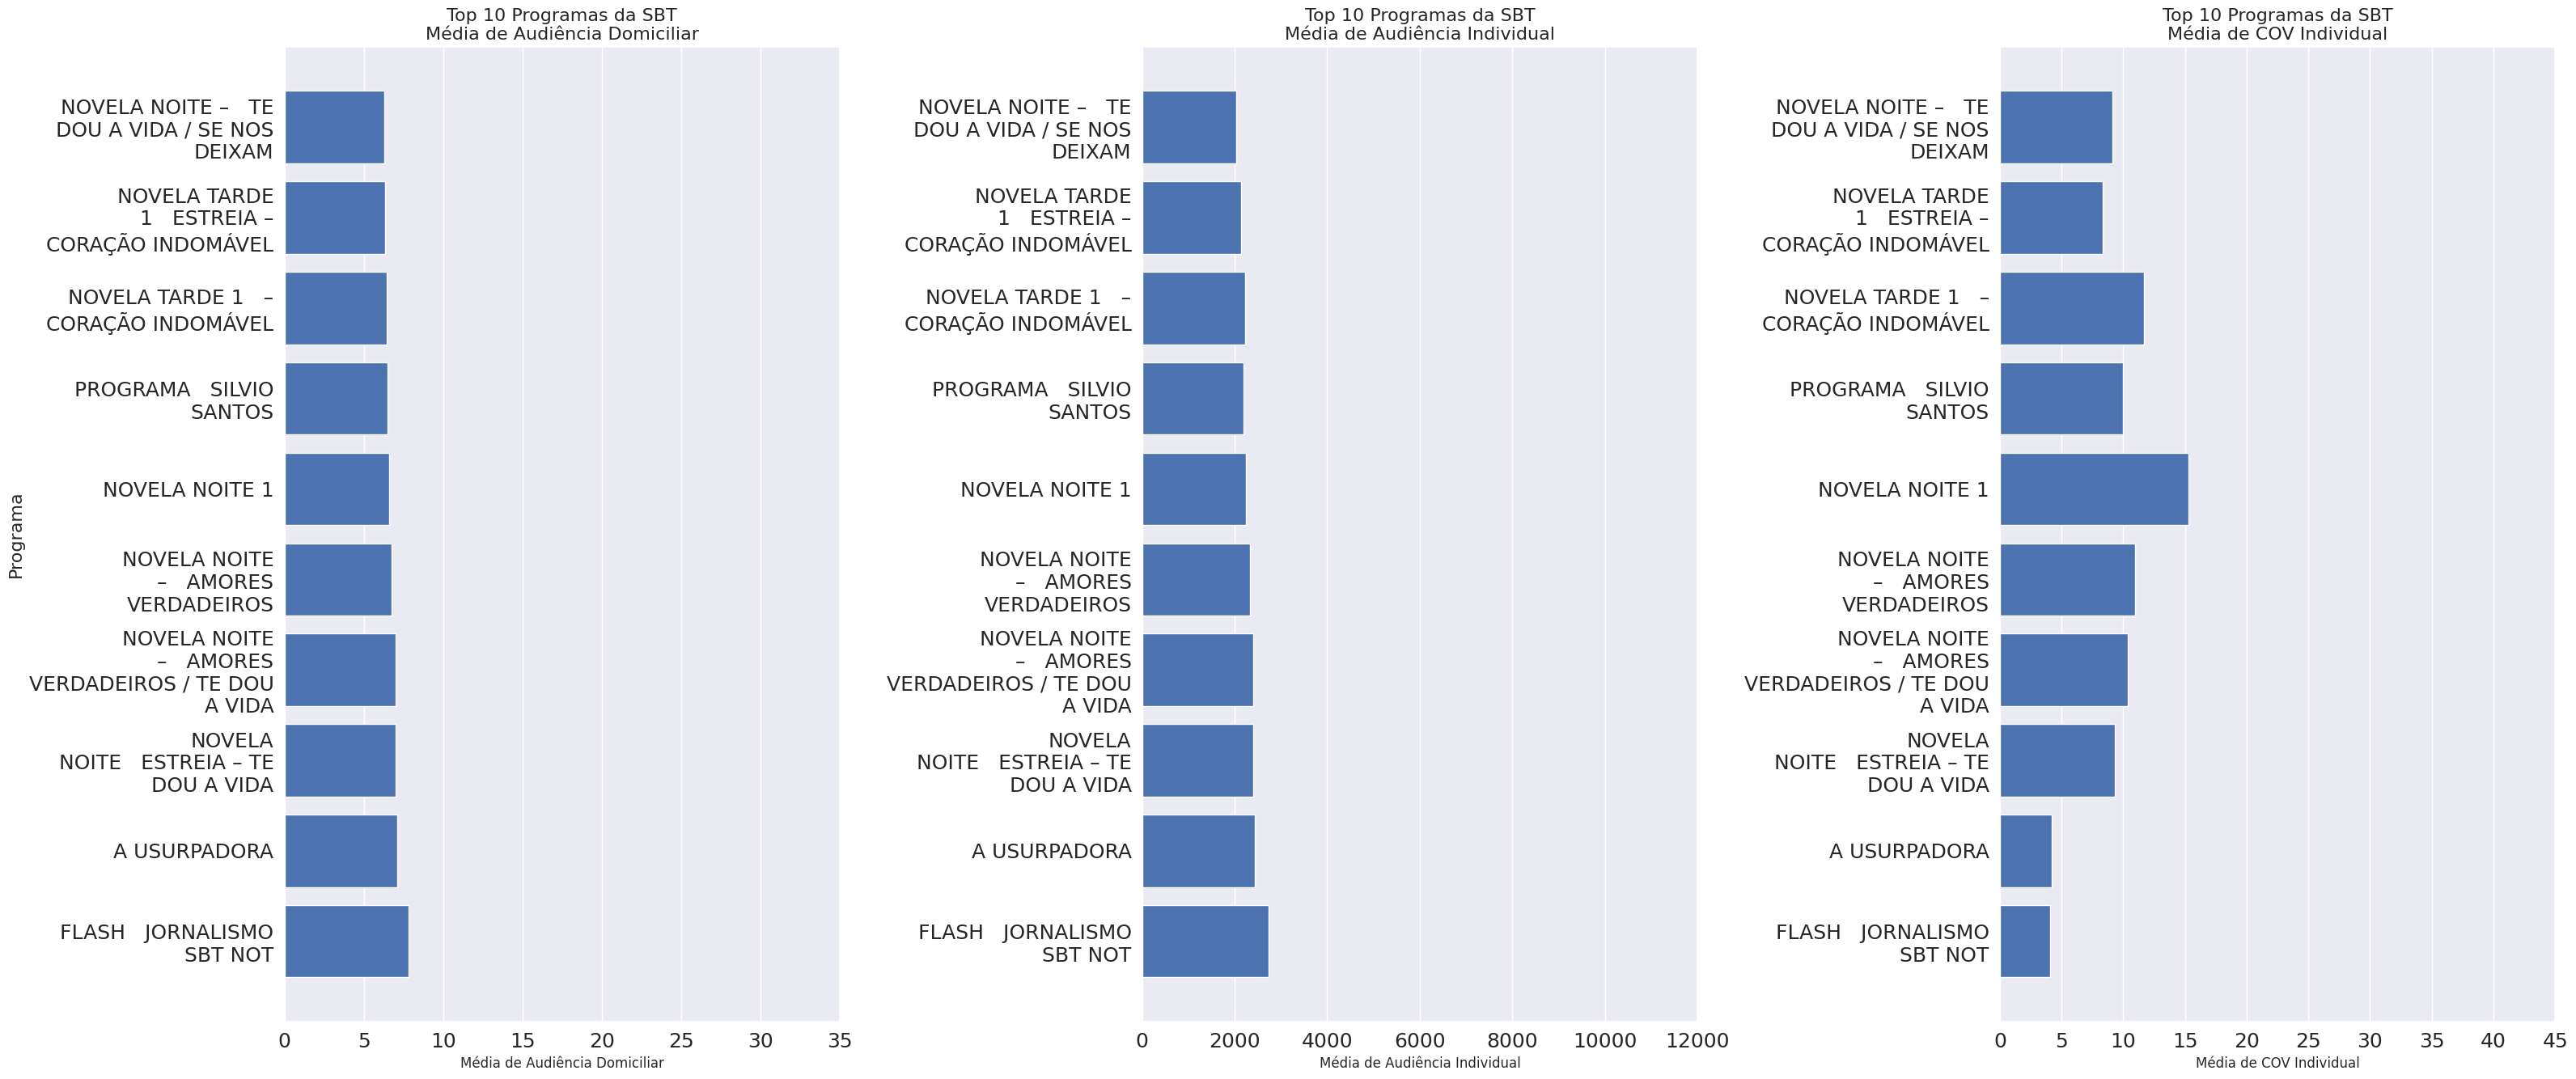

In [31]:
plot_top_programas_por_emissora(df_filtered, 'SBT', top_n=10, max_chars_per_line=20)

###TOP 10 REDE TV! FILTRADO

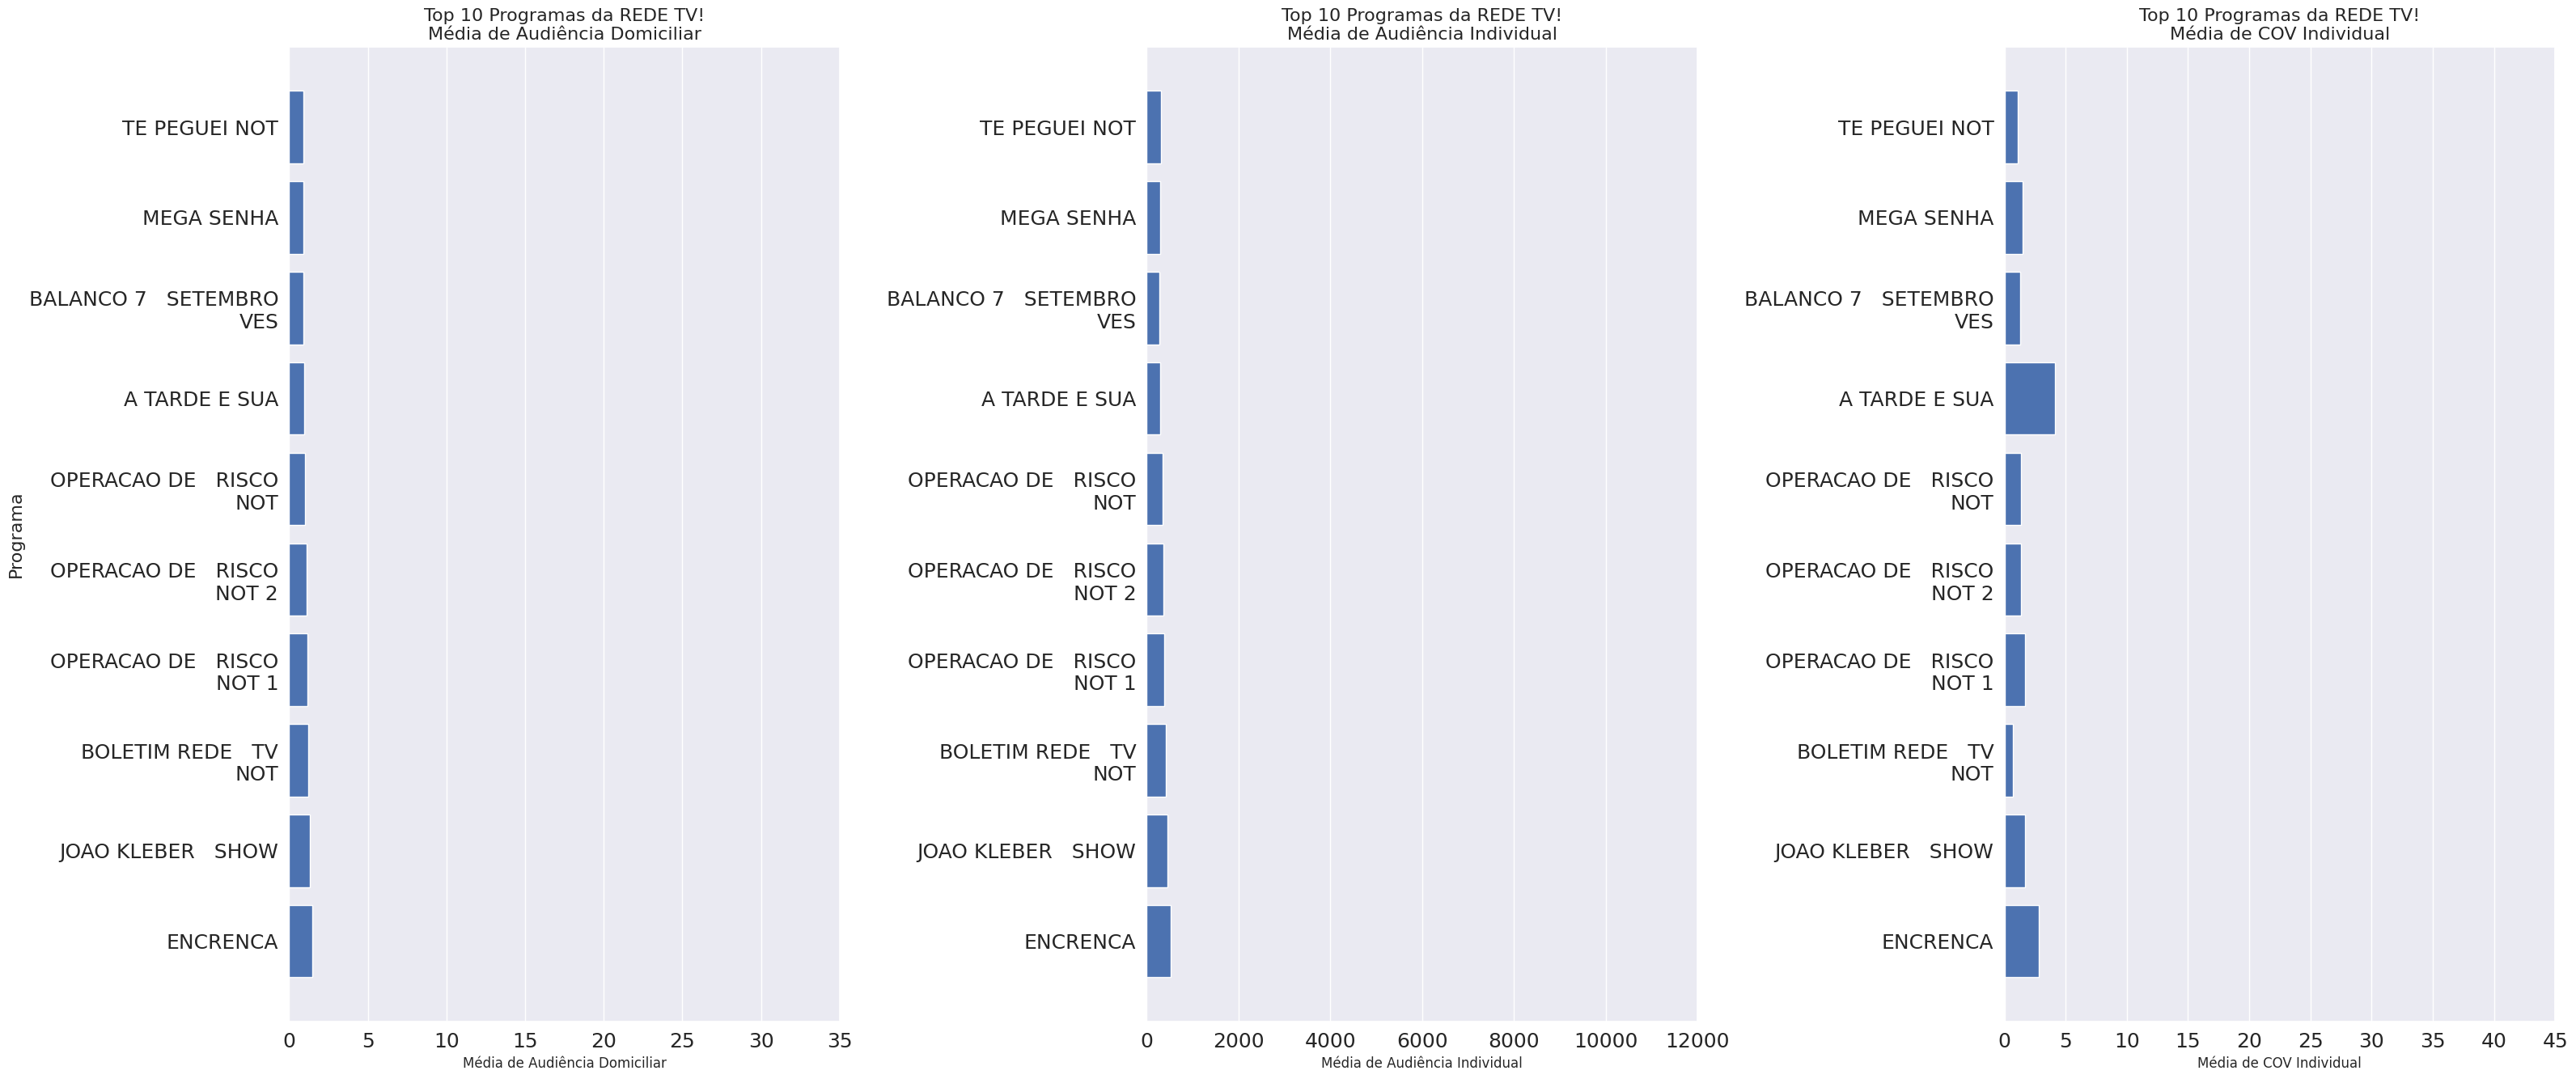

In [32]:
plot_top_programas_por_emissora(df_filtered, 'REDE TV!', top_n=10, max_chars_per_line=20)

In [32]:
# Estudar mais sobre as métricas
# Pensar na visualização com outra métrica guiando o eixo